# Social-Space-Function Playground
This "Playground" can be used to play around with the social space cost function.
Thereby, only Python2 and no ROS is required.

In [184]:
import numpy as np
from matplotlib import pyplot as plt

from lib_socialspace_function import asymmetric_gaussian, triangle, ellipse
from lib_socialspace_function import personal_space, passing_space, activity_space_object, activity_space_human
from lib_socialspace_function import social_space

## 1. Basic Functions


### 1.1. Asymmetric Gaussian

**&rarr; demonstrate asymmetric gaussian**

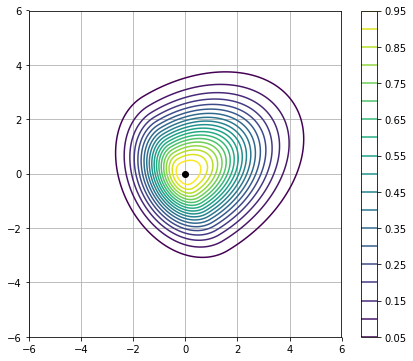

In [185]:
human_x = 0.0
human_y = 0.0
x = np.arange(-6.0, 6.0, 0.01)
y = np.arange(-6.0, 6.0, 0.01)

X, Y = np.meshgrid(x, y)
Z = asymmetric_gaussian(X, Y, human_x, human_y, np.pi / 6.0, 2.0, 4.0 / 3.0, 1.0)

plt.figure(figsize=(7, 6))
plt.plot(human_x, human_y, color='black', marker='o')
plt.contour(X, Y, Z, 20)
plt.grid(True)
plt.colorbar()

### 1.2. Triangle

**&rarr; demonstrate triangle**

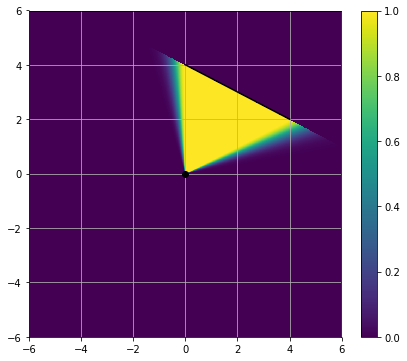

In [186]:
human_x = 0.0
human_y = 0.0
object_x_start = 0.0
object_y_start = 4.0
object_x_end = 4.0
object_y_end = 2.0
x = np.arange(-6.0, 6.0, 0.01)
y = np.arange(-6.0, 6.0, 0.01)

X, Y = np.meshgrid(x, y)
Z = triangle(X, Y, human_x, human_y, object_x_start, object_y_start, object_x_end, object_y_end, np.pi / 36.0)

plt.figure(figsize=(7, 6))
plt.plot(human_x, human_y, color='black', marker='o')
plt.plot([object_x_start, object_x_end], [object_y_start, object_y_end], color='black')
plt.pcolormesh(X, Y, Z)
plt.grid(True)
plt.colorbar()

### 1.3. Ellipse

**&rarr; demonstrate ellipse**

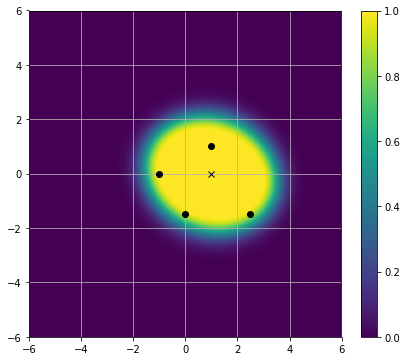

In [187]:
human1_x = -1.0
human1_y = 0.0
human2_x = 1.0
human2_y = 1.0
human3_x = 0.0
human3_y = -1.5
human4_x = 2.5
human4_y = -1.5
center_x = 1.0
center_y = 0.0
x = np.arange(-6.0, 6.0, 0.01)
y = np.arange(-6.0, 6.0, 0.01)

X, Y = np.meshgrid(x, y)
Z = ellipse(X, Y,
            np.array([(human1_x, human1_y), (human2_x, human2_y), (human3_x, human3_y), (human4_x, human4_y)]),
            np.array([center_x, center_y]), 0.5)

plt.figure(figsize=(7, 6))
plt.plot(human1_x, human1_y, color='black', marker='o')
plt.plot(human2_x, human2_y, color='black', marker='o')
plt.plot(human3_x, human3_y, color='black', marker='o')
plt.plot(human4_x, human4_y, color='black', marker='o')
plt.plot(center_x, center_y, color='black', marker='x')
plt.pcolormesh(X, Y, Z)
plt.grid(True)
plt.colorbar()

## 2. Parameterized Functions for Modelling the Social Space <a name="part2"></a>

**&rarr; remodel ROS message types in python such that we can run without ROS**

In [188]:
class Human:
    def __init__(self, x, y, theta, velocity, confidence):
        self.x = x  # x position
        self.y = y  # y position
        self.theta = theta  # orientation of human in rad within [-pi, pi]
        self.velocity = velocity  # velocity of human in meters per second
        self.confidence = confidence


class HumanWithInteractions:
    def __init__(self, human, object_interactions=None, human_interactions=None):
        self.human = human
        self.object_interactions = object_interactions  # set of Interactions containing the Objects interacted with by this human
        if self.object_interactions is None:
            self.object_interactions = []
        self.human_interactions = human_interactions  # set of Interactions containing the Humans interacted with by this human
        if self.human_interactions is None:
            self.human_interactions = []


class Object:
    def __init__(self, x_start, y_start, x_end, y_end):
        # an object is interpreted as a line from (x_start, y_start) to (x_end, y_end)
        self.x_start = x_start
        self.y_start = y_start
        self.x_end = x_end
        self.y_end = y_end


class Interaction:
    def __init__(self, humans_or_object, confidence):
        self.item = humans_or_object
        self.confidence = confidence  # between 0 and 1 (activity vs affordance space)


class ObjectInteraction(Interaction):
    def __init__(self, obj, confidence):
        Interaction.__init__(self, obj, confidence)


class HumanInteraction(Interaction):
    def __init__(self, humans, center_x, center_y, confidence):
        Interaction.__init__(self, humans, confidence)
        self.center_x = center_x
        self.center_y = center_y

**&rarr; utility function for plotting**

In [189]:
def plot_space(humans, objects, X, Y, space, plot_contour=False, plot_size=12, plot_colorbar=True):
    plt.figure(figsize=(plot_size+1 if plot_colorbar else plot_size, plot_size))
    for human in humans:
        plt.plot(human.x, human.y, color='black', marker='o')
    for obj in objects:
        plt.plot([obj.x_start, obj.x_end], [obj.y_start, obj.y_end], color='black', linewidth=3)
    if plot_contour:
        plt.contour(X, Y, space, 20)
    else:
        plt.pcolormesh(X, Y, space)
    plt.grid(True)
    if plot_colorbar:
        plt.colorbar()

## 2.1. Personal Space

**&rarr; demonstrate personal space** which uses asymmetric Gaussian for modelling

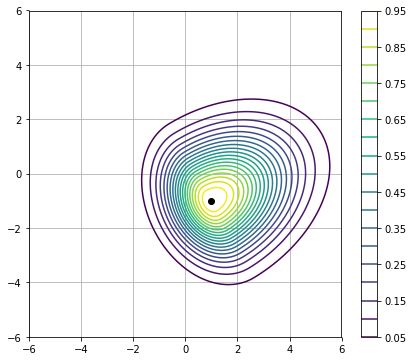

In [190]:
human = Human(x=1.0, y=-1.0, theta=np.pi / 6.0, velocity=1.0, confidence=1.0)

x = np.arange(-6.0, 6.0, 0.01)
y = np.arange(-6.0, 6.0, 0.01)

X, Y = np.meshgrid(x, y)
Z = personal_space(X, Y, human, sigma_h_factor=1.0)
plot_space([human], [], X, Y, Z, plot_contour=True, plot_size=6)
plt.savefig('personal_space.png')

## 2.2. Passing Space

**&rarr; demonstrate passing space** which uses asymmetric Gaussian for modelling

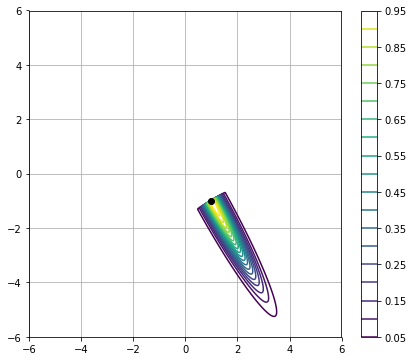

In [191]:
human = Human(x=1.0, y=-1.0, theta=np.pi / 6.0, velocity=1.0, confidence=1.0)

x = np.arange(-6.0, 6.0, 0.01)
y = np.arange(-6.0, 6.0, 0.01)

X, Y = np.meshgrid(x, y)
Z = passing_space(X, Y, human, right_hand_traffic=True, sigma_h=2.0, sigma_s=0.25, sigma_r=0.01)
plot_space([human], [], X, Y, Z, plot_contour=True, plot_size=6)
plt.savefig('passing_space.png')

## 2.3. Activity Space for Interactions with Objects

**&rarr; demonstrate activity space for objects** which uses triangle for modelling

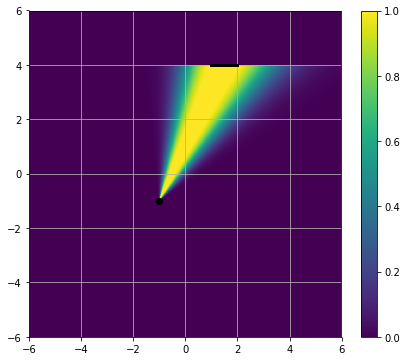

In [192]:
human = Human(x=-1.0, y=-1.0, theta=np.pi / 6.0, velocity=0.0, confidence=1.0)
obj = Object(1.0, 4.0, 2.0, 4.0)

x = np.arange(-6.0, 6.0, 0.01)
y = np.arange(-6.0, 6.0, 0.01)

X, Y = np.meshgrid(x, y)
Z = activity_space_object(X, Y, human, ObjectInteraction(obj, 1.0), sigma=np.pi / 36.0 * 5.0/3.0)
plot_space([human], [obj], X, Y, Z, plot_size=6)
plt.savefig('activity_object.png')

## 2.4. Activity Space for Interactions with other Humans

**&rarr; demonstrate activity space for humans** which uses ellipse for modelling

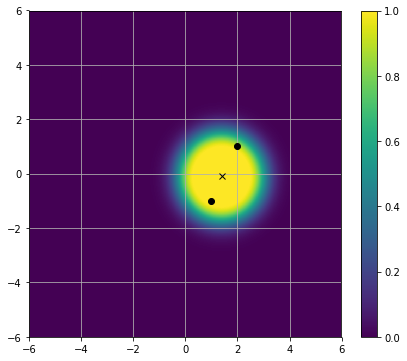

In [193]:
humanA = Human(x=1.0, y=-1.0, theta=np.pi / 4.0, velocity=0.0, confidence=1.0)
humanB = Human(x=2.0, y=1.0, theta=-np.pi * 3.0 / 4.0, velocity=0.0, confidence=1.0)

x = np.arange(-6.0, 6.0, 0.01)
y = np.arange(-6.0, 6.0, 0.01)

X, Y = np.meshgrid(x, y)
Z = activity_space_human(X, Y, humanA, HumanInteraction([humanB], 1.4, -0.1, 1.0), sigma=0.5)
plot_space([humanA, humanB], [], X, Y, Z, plot_size=6)
plt.plot(1.4, -0.1, color='black', marker='x')
plt.savefig('activity_human.png')

## 3. Social Space Function

**&rarr; demonstrate social space**

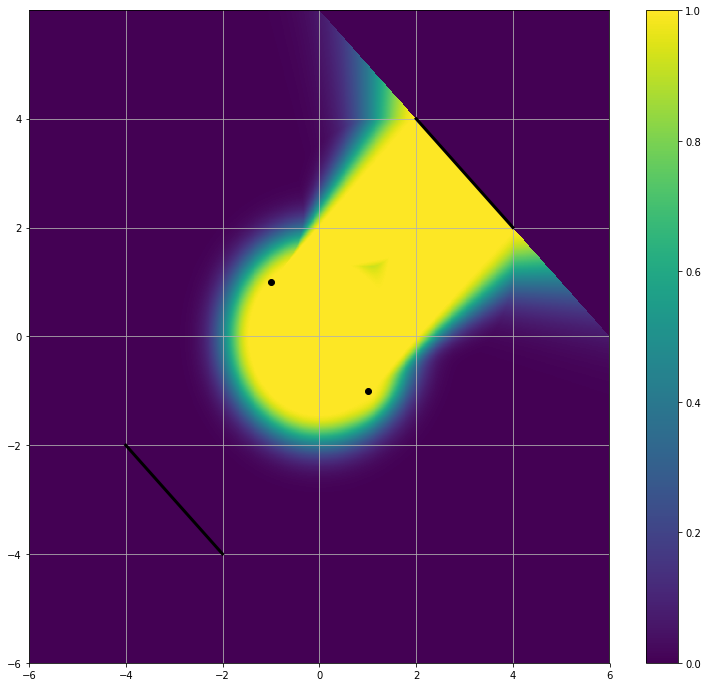

In [194]:
object1 = Object(2.0, 4.0, 4.0, 2.0)
object2 = Object(-2.0, -4.0, -4.0, -2.0)
objects = [object1, object2]

humanA = Human(x=1.0, y=-1.0, theta=3.0 / 4.0 * np.pi, velocity=0.0, confidence=1.0)
humanB = Human(x=-1.0, y=1.0, theta=-1.0 / 4.0 * np.pi, velocity=0.0, confidence=1.0)
humans = [humanA, humanB]

hA = HumanWithInteractions(humanA, object_interactions=[ObjectInteraction(object1, 1.0)],
                           human_interactions=[HumanInteraction([humanB], 0.0, 0.0, 1.0)])
hB = HumanWithInteractions(humanB, object_interactions=[ObjectInteraction(object1, 1.0)])
humans_with_interactions = [hA, hB]

x = np.arange(-6.0, 6.0, 0.01)
y = np.arange(-6.0, 6.0, 0.01)

X, Y = np.meshgrid(x, y)
Z = social_space(X, Y, humans_with_interactions)

plot_space(humans, objects, X, Y, Z)

## 4. Example Scenarios

**&rarr; rebuild gazebo's simple_office**

In [195]:
left_wall = Object(-5.0, -5.0, -5.0, 6.0)
right_wall = Object(5.0, -5.0, 5.0, 6.0)
bottom_wall = Object(-5.0, -5.0, 5.0, -5.0)
mid_wall_left = Object(-5.0, 5.0, 1.0, 5.0)
mid_wall_right = Object(2.0, 5.0, 5.0, 5.0)

walls = [right_wall, left_wall, bottom_wall, mid_wall_left, mid_wall_right]

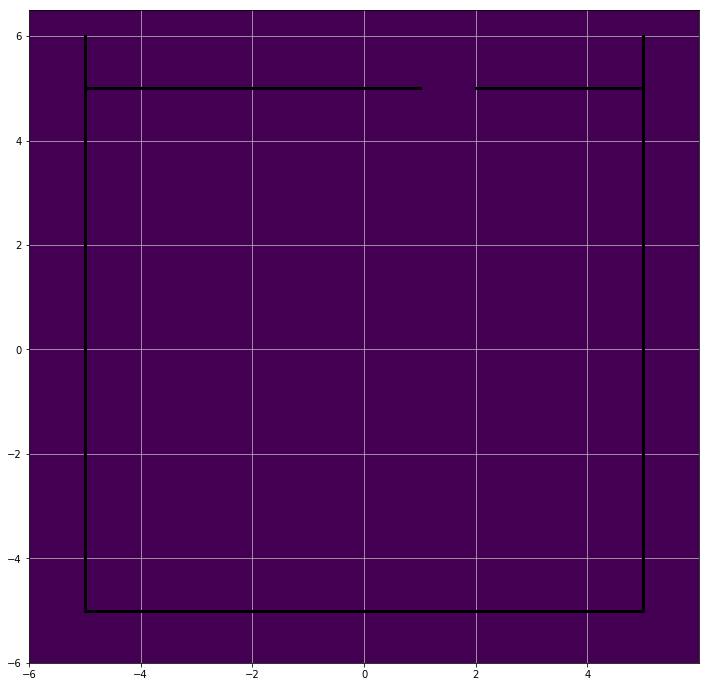

In [196]:
x = np.arange(-6.0, 6.0, 0.01)
y = np.arange(-6.0, 6.5, 0.01)

X, Y = np.meshgrid(x, y)
Z = np.zeros_like(X, dtype=float)

plot_space([], walls, X, Y, Z, plot_colorbar=False)

**&rarr; utility function for plotting scenario trajectories**

In [197]:
def add_to_plot(start_x, start_y, goal_x, goal_y, start_color='black', goal_color='black', line_color='black'):
    plt.plot(start_x, start_y, color=start_color, marker='D', markersize=14)
    plt.plot(goal_x, goal_y, color=goal_color, marker='X', markersize=14)
    plt.plot([start_x, goal_x], [start_y, goal_y], color=line_color, linewidth=3)

### 4.1. Scenario1: Person Interacting with an Object
Personal space: This is what already exists in ROS and we can do it as well.
Activity space with object is "new".

Place the robot and the goal such that the robot would drive through the activity space when there is no interaction modelled.

Interesting question: Is the robot going behind the object or behind the human or even through the space?
**&rarr; cost of way vs cost of map**

Will the robot choose an unreasonable root as the space is only considered step by step in case of the local planner?
**&rarr; socially accepted behaviour (dependent on foresight of local planner ?)**

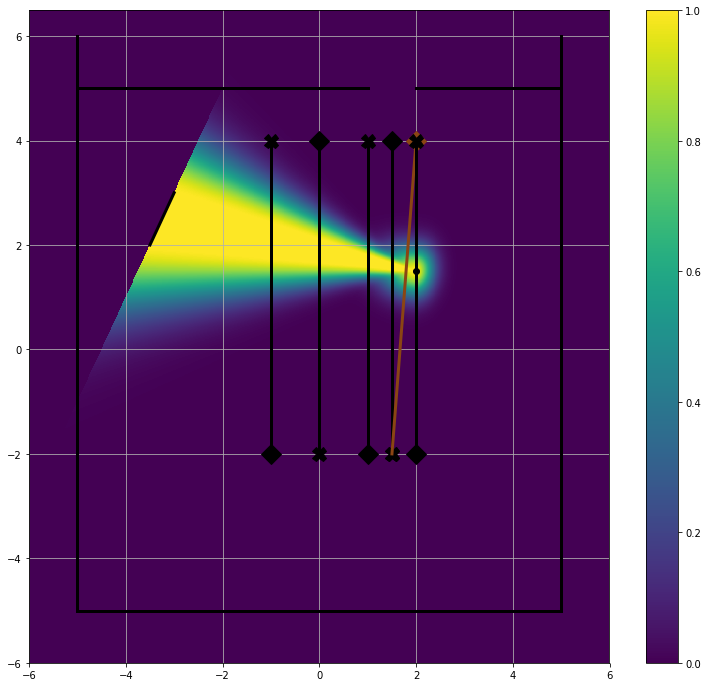

In [198]:
object1 = Object(-3.5, 2.0, -3.0, 3.0)
objects = [object1]
objects.extend(walls)

humanA = Human(x=2.0, y=1.5, theta=170.0 * np.pi / 180.0, velocity=0.0, confidence=1.0)
humans = [humanA]

hA = HumanWithInteractions(humanA, object_interactions=[ObjectInteraction(object1, 1.0)])
humans_with_interactions = [hA]

x = np.arange(-6.0, 6.0, 0.01)
y = np.arange(-6.0, 6.5, 0.01)

X, Y = np.meshgrid(x, y)
Z = social_space(X, Y, humans_with_interactions)

plot_space(humans, objects, X, Y, Z)
add_to_plot(-1.0, -2.0, -1.0, 4.0)
add_to_plot(0.0, 4.0, 0.0, -2.0)
add_to_plot(1.0, -2.0, 1.0, 4.0)
add_to_plot(1.5, 4.0, 1.5, -2.0)
add_to_plot(2.0, 4.0, 1.5, -2.0, start_color='saddlebrown', line_color='saddlebrown')
add_to_plot(2.0, -2.0, 2.0, 4.0)
plt.savefig('scenario1.png')

### 4.2. Scenario2: Person Interacting with Objects - Activity vs Affordance Space
"Activity" Space vs Affordance Space

Place the robot and the goal such that it could go through both the activity and the affordance space.

Interesting question: Is the robot going behind through the affordance space or is it violating the "activity" space?
**&rarr; cost of way vs cost of map**

Will the robot choose an unreasonable root as the space is only considered step by step in case of the local planner?
**&rarr; socially accepted behaviour (dependent on foresight of local planner ?)**

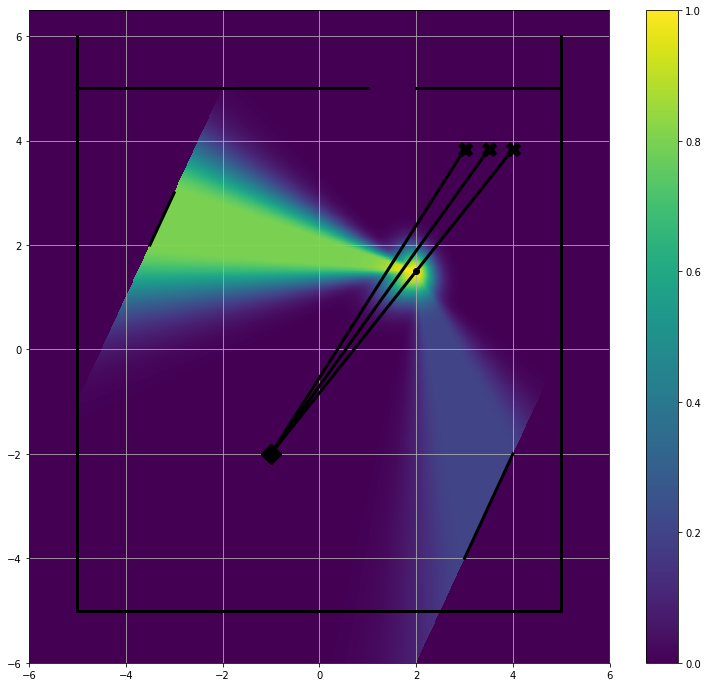

In [199]:
object1 = Object(-3.5, 2.0, -3.0, 3.0)
object2 = Object(3.0, -4.0, 4.0, -2.0)
objects = [object1, object2]
objects.extend(walls)

humanA = Human(x=2.0, y=1.5, theta=-152.0 * np.pi / 180.0, velocity=0.0, confidence=1.0)
humans = [humanA]

hA = HumanWithInteractions(humanA, object_interactions=[ObjectInteraction(object1, 0.8), ObjectInteraction(object2, 0.2)])
humans_with_interactions = [hA]

x = np.arange(-6.0, 6.0, 0.01)
y = np.arange(-6.0, 6.5, 0.01)

X, Y = np.meshgrid(x, y)
Z = social_space(X, Y, humans_with_interactions)

plot_space(humans, objects, X, Y, Z)
add_to_plot(-1.0, -2.0, 4.0, 3.83)
add_to_plot(-1.0, -2.0, 3.5, 3.83)
add_to_plot(-1.0, -2.0, 3.0, 3.83)
plt.savefig('scenario2.png')

### 4.3. Scenario3: Two Persons Interacting with eachother
Activity space with humans is "new".

Place the robot and the goal such that the robot would drive through the F-Formation when there is no interaction modelled.

Interesting question: Is the robot going through the group or it bypassing it?
**&rarr; cost of way vs cost of map**

Will the robot choose an unreasonable root as the space is only considered step by step in case of the local planner?
**&rarr; socially accepted behaviour (dependent on foresight of local planner ?)**

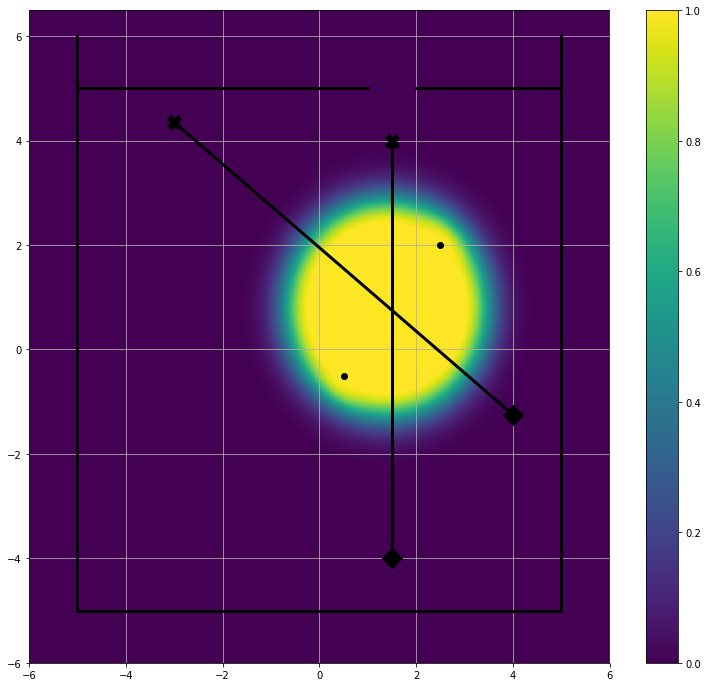

In [200]:
objects = []
objects.extend(walls)

humanA = Human(x=2.5, y=2.0, theta=-135.0 * np.pi / 180.0, velocity=0.0, confidence=1.0)
humanB = Human(x=0.5, y=-0.5, theta=45.0 * np.pi / 180.0, velocity=0.0, confidence=1.0)
humans = [humanA, humanB]

hA = HumanWithInteractions(humanA, human_interactions=[HumanInteraction([humanB], 1.4, 0.8, 1.0)])
hB = HumanWithInteractions(humanB, human_interactions=[HumanInteraction([humanA], 1.4, 0.8, 1.0)])
humans_with_interactions = [hA, hB]

x = np.arange(-6.0, 6.0, 0.01)
y = np.arange(-6.0, 6.5, 0.01)

X, Y = np.meshgrid(x, y)
Z = social_space(X, Y, humans_with_interactions)

plot_space(humans, objects, X, Y, Z)
add_to_plot(1.5, -4.0, 1.5, 4.0)
add_to_plot(4.0, -1.25,-3.0, 4.35)
plt.savefig('scenario3.png')

### 4.4. Scenario4: Two Persons Interacting with the same Object

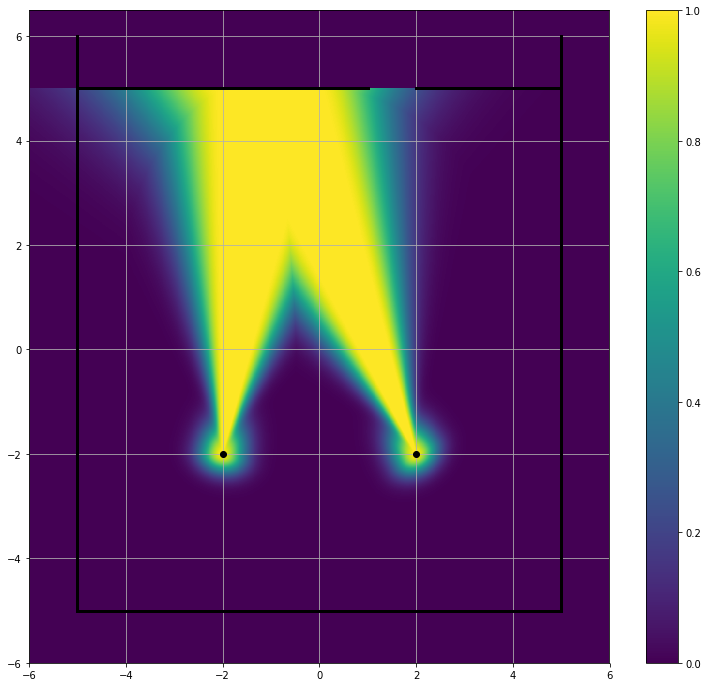

In [201]:
object1 = Object(-2.0, 5.0, 0.0, 5.0)
objects = [object1]
objects.extend(walls)

humanA = Human(x=-2.0, y=-2.0, theta=78.0 / 180.0 * np.pi, velocity=0.0, confidence=1.0)
humanB = Human(x=2.0, y=-2.0, theta=122.0 / 180.0 * np.pi, velocity=0.0, confidence=1.0)
humans = [humanA, humanB]

hA = HumanWithInteractions(humanA, object_interactions=[ObjectInteraction(object1, 1.0)])
hB = HumanWithInteractions(humanB, object_interactions=[ObjectInteraction(object1, 1.0)])
humans_with_interactions = [hA, hB]

x = np.arange(-6.0, 6.0, 0.01)
y = np.arange(-6.0, 6.5, 0.01)

X, Y = np.meshgrid(x, y)
Z = social_space(X, Y, humans_with_interactions)

plot_space(humans, objects, X, Y, Z)
